# Bài Colab số 2: dự đoán thời gian chạy chương trình

Thành viên nhóm:

- Lê Trần Trọng Khiêm - 19521689
- Trần Tiến Hưng - 19521587
- Lê Đặng Đăng Huy - 19521612

Import một số thư viện cần thiết

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tải dữ liệu từ google drive

In [63]:
!gdown --id 11j5wIs8vlxKTxgElX8FdW616ybhNbC_H -O train.txt

Downloading...
From: https://drive.google.com/uc?id=11j5wIs8vlxKTxgElX8FdW616ybhNbC_H
To: /content/train.txt
100% 1.20M/1.20M [00:00<00:00, 79.0MB/s]


In [64]:
!gdown --id 1lHABkpe-ljfYBURQ_cdb716tTIu-N3m0 -O test.txt

Downloading...
From: https://drive.google.com/uc?id=1lHABkpe-ljfYBURQ_cdb716tTIu-N3m0
To: /content/test.txt
100% 179k/179k [00:00<00:00, 62.0MB/s]


# Load dữ liệu từ file txt và phân tích

In [65]:
train = pd.read_csv('train.txt', delimiter=',', header=None)
test = pd.read_csv('test.txt', delimiter=',', header=None)

In [66]:
train.head()

,0,1
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71115 entries, 0 to 71114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       71115 non-null  int64  
 1   1       71115 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [68]:
train.describe()

,0,1
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10590 non-null  int64  
 1   1       10590 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 165.6 KB


Tập train có 71115 data point và tập test có 10590 datapoint

Có thể tóm lại tập train như sau:
- Cột đầu là int64 và cột 2 là float64
- Cột 0 (feature):
  - Giá trị thuộc khoảng [255; 9999882]
  - Mean: 4998766.3619
  - Std: 2882618.1742
- Cột 1 (label):
  - Giá trị thuộc khoảng [0.000009; 0.983776]
  - Mean: 0.406785
  - Std: 0.244039

# Tách feature và label

In [70]:
X_train = train.iloc[:, 0:-1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, 0:-1].values
y_test = test.iloc[:, -1].values

In [71]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(71115, 1) (71115,)
(10590, 1) (10590,)


In [72]:
X_train[:5]

array([[6083695],
       [1954367],
       [3734185],
       [5839301],
       [6343427]])

In [73]:
y_train[:5]

array([0.521842, 0.152648, 0.298548, 0.46048 , 0.527977])

# Trực quan hóa dữ liệu

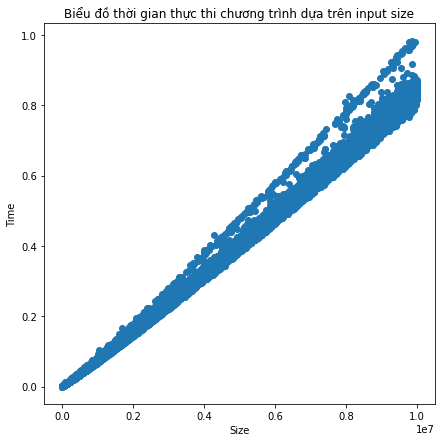

In [74]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thời gian thực thi chương trình dựa trên input size')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_train, y_train)
fig.show()

Nhìn vào dữ liệu đã được trực quan hóa, chúng ta có thể dễ dàng nhận thấy dữ liệu có phân bố tuyến tính, các điểm dữ liệu gần như nằm trên cùng một đường thẳng. Do đó chúng ta có thể sử dụng LinearRegression.

# Tạo model LinearRegression và train

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Đánh giá mô hình

Sau khi đã train xong, chúng ta sẽ tiến hành đánh giá mô hình trên tập test.

Có nhiều độ đo để đánh giá một mô hình regression, tuy nhiên phổ biến nhất có thể kể đến:

- R square/Adjusted R square
- Mean squared error (MSE)/Root mean squared error (RMSE)
- Mean absolute error (MAE)

Trong bài này sẽ sử dụng:

- R square (cao hơn là tốt hơn)
- Mean squared error (MSE - Thấp hơn là tốt hơn)
- Mean absolute error (MAE - Thấp hơn là tốt hơn)

In [76]:
print(f'Mean of test set: {np.average(y_test)}')

Mean of test set: 2.642811968838527


In [77]:
y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE score: {mean_absolute_error(y_test, y_pred)}')

R2 score: 0.9284132208349453
MSE: 0.020664949397549082
MAE score: 0.12271198006925235


Như vậy có thể thấy, mô hình thể hiện rất tốt trên tập test

# Trực quan hóa mô hình

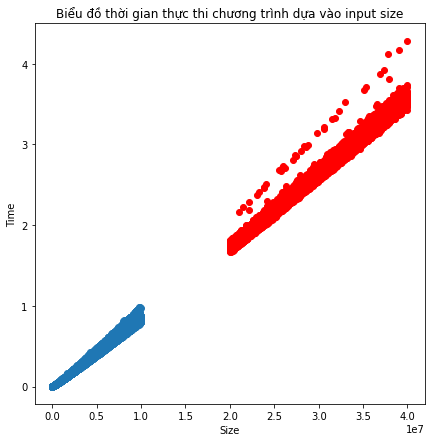

In [79]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thời gian thực thi chương trình dựa vào input size')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='red')
fig.show()

Có thể thấy được rằng phân bố của tập train và tập test đều gần như nằm trên cùng một đường thẳng, tuy nhiên tập test có khá nhiều outliers, khi input size càng lớn thì dữ liệu càng bị phân kỳ.

## Model on training set

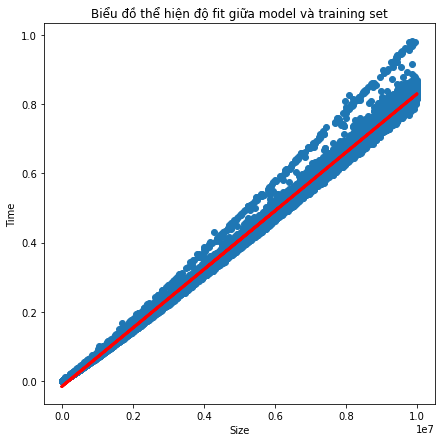

In [80]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thể hiện độ fit giữa model và training set')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3)
fig.show()

## Model on test set

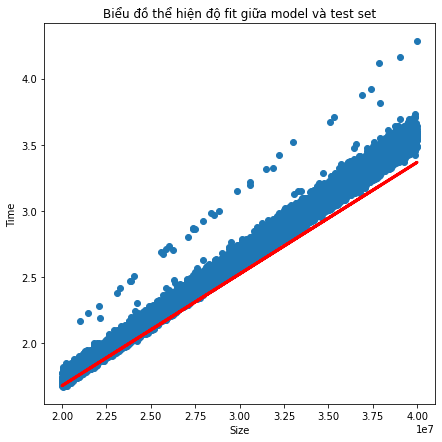

In [81]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thể hiện độ fit giữa model và test set')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
fig.show()

Có thể thấy được rằng dù model rất fit với training set, tuy nhiên, đối với test set thì lại hơi lệch xuống phía dưới.

## Nhìn tổng thể model trên tập train và test

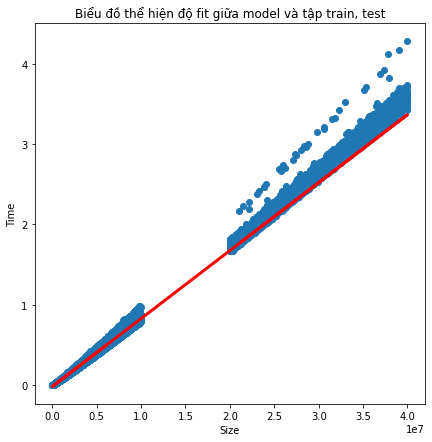

In [82]:
feature = np.concatenate((X_train, X_test))
label = np.concatenate((y_train, y_test))

fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thể hiện độ fit giữa model và tập train, test')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(feature, label)
plt.plot(feature, model.predict(feature), color='red', linewidth=3)
fig.show()

Sau khi trực quan hóa, có thể thấy rằng, mặc dù model rất fit với tập train, tuy nhiên với tập test thì lại có sự sai lệch.

Cụ thể là giá trị mà model dự đoán hơi thấp một chút so với thực tế. Khi nhìn tổng thể sự phân bố dữ liệu thì không hẳn là đường thẳng, có sự hơi cong nhẹ lên phía trên. Do đó chúng ta cần tiến hành điều chỉnh để model có thể perform tốt hơn trên tập test.

# Hiệu chỉnh mô hình

Như đã phân tích bên trên, dữ liệu có xu hướng nằm trên một đường hơi cong nhẹ lên phía trên, đây là dạng đồ thị của một hàm mũ $x^n$. Do đó, chúng ta xử lý feature X để model dễ dàng fit với nó hơn bằng cách cho X đi qua một hàm mũ hoặc ít nhất là một hàm có dạng đồ thị cong lên như vậy (ví dụ $x*log_n(x))$

Chúng ta sẽ lần lượt kiểm thử qua các hàm để xem hàm nào phù hợp

## $ x^n $

Đối với hàm này thì do đồ thị cong rất ít nên n sẽ rất nhỏ, mình sẽ thử lần lượt 1.05 đến 1.2

====== n = 1.05 ======
R2 score: 0.9872407405902435
MSE: 0.0036832143187345966
MAE score: 0.04611593831713093
====== n = 1.1 ======
R2 score: 0.8847624221265409
MSE: 0.03326562171431835
MAE score: 0.16624932301939851
====== n = 1.1500000000000001 ======
R2 score: 0.590638938356372
MSE: 0.11817022253072725
MAE score: 0.3208310456599061
====== n = 1.2000000000000002 ======
R2 score: 0.0698901969224498
MSE: 0.26849471702652805
MAE score: 0.4846141000810583


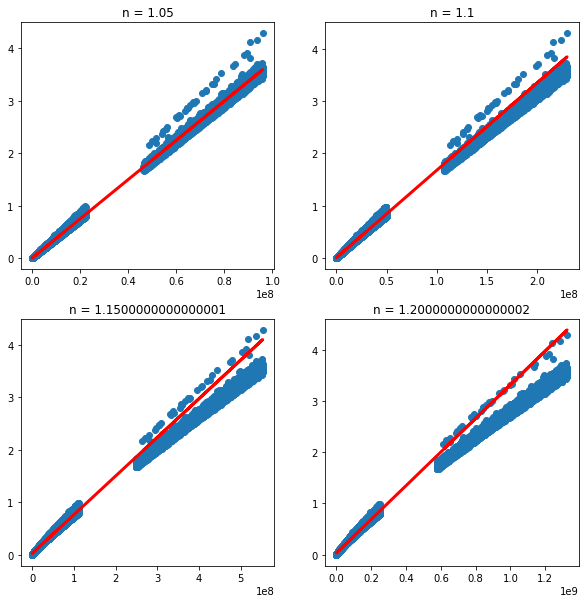

In [83]:
def new_feat(X, n):
  return X ** n

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
n = 1.05
for i in range(len(axs)):
  for j in range(len(axs[0])):
    feature = np.concatenate((X_train, X_test))
    feature = new_feat(feature, n)
    label = np.concatenate((y_train, y_test))

    new_model = LinearRegression()
    new_model.fit(new_feat(X_train, n), y_train)
    y_pred = new_model.predict(new_feat(X_test, n))

    axs[i, j].set_title(f'n = {n}')
    axs[i, j].scatter(feature, label)
    axs[i, j].plot(feature, new_model.predict(feature), color='red', linewidth=3)

    print(f'====== n = {n} ======')
    print(f'R2 score: {r2_score(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'MAE score: {mean_absolute_error(y_test, y_pred)}')

    n += 0.05

fig.show()

Nhìn vào hình trên có thể thấy được rằng, chọn n = 1.05 là phù hợp nhất vì khi n = 1.05, model vừa fit training set và vừa fit với test set. Điểm số đạt được tốt hơn hẳn lúc đầu (R2 0.987 so với 0.928 lúc đầu)

**=> $x = x^{1.05}$**

## x * log(x)

Tiếp theo chúng ta sẽ thử với hàm log. Trước tiên chúng ta sẽ thử với hàm log phổ biến trước (n = 2, e và 10)

R2 score: 0.9814873856972811
MSE: 0.005344034781896974
MAE score: 0.05783744100902287


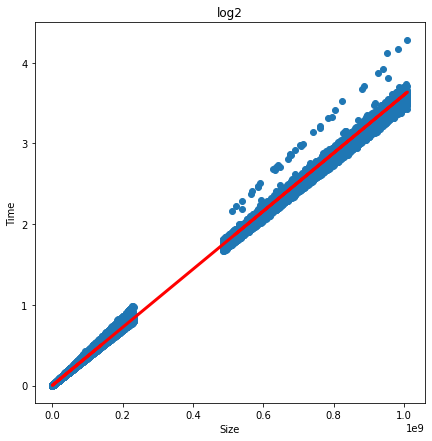

In [84]:
def new_feat(X):
  return X * np.log2(X)

fig = plt.figure(figsize=(7, 7))
feature = np.concatenate((X_train, X_test))
feature = new_feat(feature)
label = np.concatenate((y_train, y_test))

new_model = LinearRegression()
new_model.fit(new_feat(X_train), y_train)
y_pred = new_model.predict(new_feat(X_test))

plt.title('log2')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(feature, label)
plt.plot(feature, new_model.predict(feature), color='red', linewidth=3)

print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE score: {mean_absolute_error(y_test, y_pred)}')

fig.show()

R2 score: 0.9814873856972812
MSE: 0.005344034781896934
MAE score: 0.0578374410090226


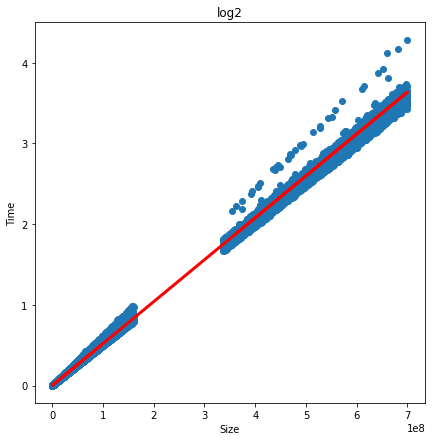

In [85]:
def new_feat(X):
  return X * np.log(X)

fig = plt.figure(figsize=(7, 7))
feature = np.concatenate((X_train, X_test))
feature = new_feat(feature)
label = np.concatenate((y_train, y_test))

new_model = LinearRegression()
new_model.fit(new_feat(X_train), y_train)
y_pred = new_model.predict(new_feat(X_test))

plt.title('log2')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(feature, label)
plt.plot(feature, new_model.predict(feature), color='red', linewidth=3)

print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE score: {mean_absolute_error(y_test, y_pred)}')

fig.show()

R2 score: 0.981487385697281
MSE: 0.00534403478189698
MAE score: 0.05783744100902291


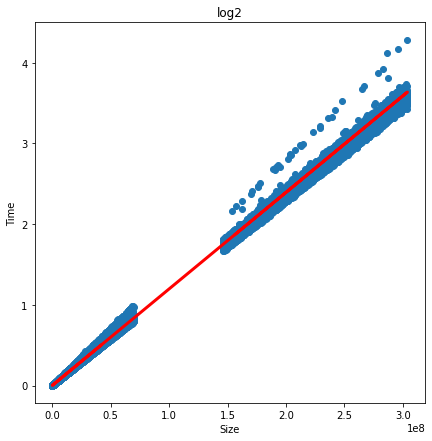

In [86]:
def new_feat(X):
  return X * np.log10(X)

fig = plt.figure(figsize=(7, 7))
feature = np.concatenate((X_train, X_test))
feature = new_feat(feature)
label = np.concatenate((y_train, y_test))

new_model = LinearRegression()
new_model.fit(new_feat(X_train), y_train)
y_pred = new_model.predict(new_feat(X_test))

plt.title('log2')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(feature, label)
plt.plot(feature, new_model.predict(feature), color='red', linewidth=3)

print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE score: {mean_absolute_error(y_test, y_pred)}')

fig.show()

Như vậy có thể thấy được là cả 3 lần với cơ số lần lượt là 2, e và 10, model đều thể hiện rất tốt và gần như tương đồng nhau (R2 xấp xỉ 0.981)

# Thử với Multiple Linear Regression

Có thể thấy là các phương pháp ở trên, mặc dù cho kết quả tốt nhưng trong thực tế khó mà áp dụng được. Lý do là bởi dữ liệu trong thực tế có thể có nhiều hơn 3 chiều, lúc đó chúng ta không thể visualize để xem xét được nữa. Và trong thực tế không phải lúc nào cũng may mắn tìm ra hàm số phù hợp như trong bài này.

Chúng ta có một cách khác để cải thiện kết quả của model đó là áp dụng data augmentation. Trong bài toán này, thay vì chỉ có 1 feature, chúng ta sẽ dựa trên feature đó để tạo ra các feature khác cho dữ liệu.

Vì đây là bài toán dự đoán thời gian chạy của chương trình, nên một số hàm có thể được áp dụng để tăng cường dữ liệu như $x^2, log(x), x*log(x)$.

In [87]:
def new_feat(X):
  return np.hstack([X, X**1.05, np.log(X), X * np.log(X)])

feature = np.concatenate((X_train, X_test))
feature = new_feat(feature)
label = np.concatenate((y_train, y_test))

new_model = LinearRegression()
new_model.fit(new_feat(X_train), y_train)
y_pred = new_model.predict(new_feat(X_test))

print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE score: {mean_absolute_error(y_test, y_pred)}')

R2 score: 0.9853605850720809
MSE: 0.004225958650795829
MAE score: 0.05029273043698385


Như chúng ta có thể thấy, kết quả của model có cải thiện so với lúc đầu. Tuy rằng không bằng khi ta cho X đi qua hàm $f(x) = n^{1.05}$, nhưng đây là cách tổng quát nhất và tự động, model có khả năng tự học và tìm ra tham số mô hình phù hợp, nên được áp dụng.

# Kết luận

Như vậy, sau khi phân tích và thực nghiệm nhiều lần, chúng ta có thể kết luận rằng cho X đi qua hàm $f(x) = x^{1.05}$ là tốt nhất, đạt điểm số tốt nhất với R2 = 0.987, MSE = 0.0037 và MAE = 0.046.

Khi áp dụng multiple linear regression bằng cách tăng cường dữ liệu, biến X chỉ từ 1 feature thành nhiều feature, model có thể tự mình học và cải thiện độ chính xác của chính nó.